## Lithium-ion Batteries

This case study is based upon the excellent example below:

https://apmonitor.com/pds/index.php/Main/LithiumIonBatteries

Along with its github repository:

https://github.com/APMonitor/pds

and license:

https://github.com/APMonitor/pds/blob/main/LICENSE

In particular, as described on the web page above:

Physical and chemical properties of the Lithium-ion silicate cathodes are used to predict the crystal structure of a Lithium-ion battery material as monoclinic, orthorhombic and triclinic. This case study demonstrates how feature engineering improves the classification results.

![](http://cdn.pixabay.com/photo/2020/01/28/15/18/battery-4800010_960_720.jpg)

**Background:** [Lithium-ion batteries](https://en.wikipedia.org/wiki/Lithium-ion_battery) are commonly used for portable electronics, electric vehicles, and aerospace applications. During discharge, Lithium ions move from the negative electrode through an electrolyte to the positive electrode to create a voltage and current. During recharging, the ions migrate back to the negative electrode. The crystal structure (monoclinic, orthorhombic, triclinic) is available for 339 different chemicals that contain lithium. Available properties are:

| Label | Description |
|------|------|
|   Materials Id  | Unique ID of the material from materialsproject.org |
|   Formula  | Chemical formula of the compound |
|   Space group  | Symmetry group of a three-dimensional crystal pattern |
|   Formation Energy (eV)  | Energy required to produce the material from standard elements |
|   E Above Hull (eV)  | Energy released if compound is decomposed into the most stable compounds |
|   Band Gap (eV)  | Energy range in a solid where no electronic states can exist. A larger band gap indicates that the compound is worse at conducting electricity or heat. |
|   Nsites  | Number of atoms in the unit cell of the crystal |
|   Density (gm/cc)  | Mass per volume of bulk crystalline materials |
|   Volume  | Unit cell volume of the material |
|   Has Bandstructure  | Boolean (True / False) variable for bandstructure |

**Objective:** Predict the crystal structure type (monoclinic, orthorhombic, triclinic) from Lithium-ion physical and chemical compound information.


**References**

Hedengren, J. D. (2021, December 16). Lithium-ion Batteries, Machine Learning for Engineers. Retrieved from https://apmonitor.com/pds/index.php/Main/LithiumIonBatteries

### Import Polymer MFR Data


In [1]:
# install package
# using for variable encoding

try:
    import chemparse
except:
    !pip install chemparse
    print('May need to restart kernel to use chemparse')

May need to restart kernel to use chemparse


Similar to case study 1, the data can be accessed directly by url.

In [2]:
import pandas as pd
url = 'http://apmonitor.com/pds/uploads/Main/lithium_ion.txt'
data = pd.read_csv(url)
data.sample(20)

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
26,mp-774171,Li3Mn2(SiO4)2,Pc,-2.608,0.087,0.000,30,2.892,361.543,True,monoclinic
148,mp-761776,LiMn(SiO3)2,Pbca,-2.824,0.036,0.037,80,3.343,850.626,False,orthorhombic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
119,mp-763256,LiCoSiO4,Pc,-2.369,0.067,1.590,14,2.998,174.957,True,monoclinic
55,mp-762645,LiFeSiO4,Pc,-2.590,0.032,2.839,28,2.843,361.800,True,monoclinic
56,mp-762786,Li3Fe2(SiO4)2,P21,-2.586,0.038,1.378,30,2.921,360.017,True,monoclinic
335,mp-849520,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic
209,mp-863911,Li2Fe(SiO3)2,Fdd2,-2.748,0.058,2.917,66,2.723,811.767,True,orthorhombic
243,mp-764957,Li2CoSiO4,Pbn21,-2.522,0.015,2.757,32,3.226,339.508,True,orthorhombic
66,mp-762565,Li10Fe(SiO5)2,C2/m,-2.476,0.055,1.715,46,2.399,472.581,True,monoclinic


Still remember the ValueError we met in Case Study 1? Because we forgot to check if there are any null values in the dataset. 

This time, let's do check that first.

![](https://i.pinimg.com/originals/05/ba/0a/05ba0af7235165ec94078d0d6661047f.jpg)

**Recall:**

data.isnull() is used to check if there is null value in the dataset. We can sum them by using sum().

data.info() and data.describe() are usually used to check the properties and basic statistics of the data.

In [3]:
data.isnull().sum().sum()

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


In [5]:
data.describe()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,-2.616950,0.058215,2.079740,38.837758,2.984003,467.765619
std,0.183809,0.030363,1.087968,23.133142,0.353968,292.674559
min,-2.985000,0.000000,0.000000,10.000000,2.200000,122.581000
25%,-2.757500,0.035500,1.265500,26.000000,2.760500,286.381500
50%,-2.605000,0.062000,2.499000,31.000000,2.947000,358.537000
75%,-2.525500,0.081500,2.968000,52.000000,3.106000,601.696500
max,-2.012000,0.190000,3.823000,132.000000,4.201000,1518.850000


Great!!! This dataset does not contain any null values. 🙂 Let's start modeling.

# Naive solution

### Classification Modeling
What is the first step? Splitting the training and test set right? 

**Recall:**
The `train_test_split` is a function in `sklearn` for the specific purpose of splitting data into train and test sets.

In [6]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.2, shuffle=True, random_state=1)

Not sure which column could be a useful feature? Let's start with the naive solution use them all first, except for `Materials Id`, since `Materials Id` is not important in this case.

**Features：**Formula	Spacegroup, Formation Energy (eV), 	E Above Hull (eV), 	Band Gap (eV), 	Nsites, 	Density (gm/cc), 	Volume, 	Has Bandstructure

**label：** Crystal System

In [7]:
from sklearn.tree import DecisionTreeClassifier
method = DecisionTreeClassifier()

In [8]:
#model = method.fit(train[['Formula', 'Spacegroup', 'Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume', 'Has Bandstructure']].to_numpy(),train['Crystal System'].to_numpy())

ValueError: could not convert string to float: 'Li4Fe2SiO7'????

![?](https://www.mememaker.net/static/images/memes/4379873.jpg)

What is 'Li4Fe2SiO7'? It looks like a Formula. Why we neet to convert it to float?

Wow! Our model can not handle the string information directly, so we need to convert it to value. Let's check their data type first.


`dtypes` is used to check data's type.

In [9]:
data.dtypes

Materials Id              object
Formula                   object
Spacegroup                object
Formation Energy (eV)    float64
E Above Hull (eV)        float64
Band Gap (eV)            float64
Nsites                     int64
Density (gm/cc)          float64
Volume                   float64
Has Bandstructure           bool
Crystal System            object
dtype: object

It turns out that we need to distinguish the types of variables first. 👀

## **Question 1** **(15 points)**

**Part 1 (5 points)**

What is the differnce between interval (also called numerical), ordinal and categorical variables? 

**Part 2 (5 points)**  

Why does it matter whether a variable is categorical, ordinal or interval? Give an example.

**Part 3 (5 points)**  

Identifies the data type of the following variables in the dataset.

`Materials Id`              
`Formula`                  
`Spacegroup`                
`Formation Energy (eV)`    
`E Above Hull (eV)`        
`Band Gap (eV)`            
`Nsites`                     
`Density (gm/cc)`          
`Volume`                   
`Has Bandstructure`           
`Crystal System`            

Hint: 
Review Randy's 🧙 class notes that can be found from Canvas.

###Question 1
#### Part 1) 
Interval Variable: Most precised and it is measured rather than classified or ordered. Examples: Age, Size, weight etc. Variables can be descrete with whole numbers or continuous with fractions.

Ordinal Variables: It has meaningful order. Interval between the value in the scale may not be equal. Examples: there may be big difference between satisfied and unsatisfied but smaller difference between satisfied and highly satisfied. Can be given in frequencies.

Categorical Variables: No sense of order. Can be stored in Words/text or given numerical code (however, number do not imply any order) To summerize, use frequencies or percentage. Examples are Sex, unique id


#### Part 2)
To summerize and get a meaning out of a given data it matters to classify a variable is categorical, ordinal or interval. For example, we have a data gender (male/female) taking mean or average will not help us or will not give any meaningful outcome of this data. if we prior know that the data is categorical we will summerize the data in Pie chart or column chart. which will save time. 

#### Part 3)
Material ID: Categorical Variable

Formaula: Categorical Variable

Spacegroup: Categorical Variable

Formation Energy (eV): Interval Variable

E Above Hull (eV): Interval Variable

Band Gap (eV): Interval Variable

Nsites: Interval Variable

Density (gm/cc): Interval Variable

Volume: Interval Variable

Has Bandstructure: Categorical Variable

Crystal System: Categorical Variable

In [10]:
# Separate into numerical features that don't need preprocessing, and categorical features that need to be transformed
num_feat = data.select_dtypes(include=['int64','float64']).columns
cat_feat = data.select_dtypes(include=['object','bool']).columns

In [11]:
num_feat

Index(['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites',
       'Density (gm/cc)', 'Volume'],
      dtype='object')

In [12]:
cat_feat

Index(['Materials Id', 'Formula', 'Spacegroup', 'Has Bandstructure',
       'Crystal System'],
      dtype='object')

Still remember how to use heatmap and pair plot to show the correlation between variables? Let's discover the correlation of all numerical variables.

**Recall:**

sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)

sns.pairplot(data)




In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

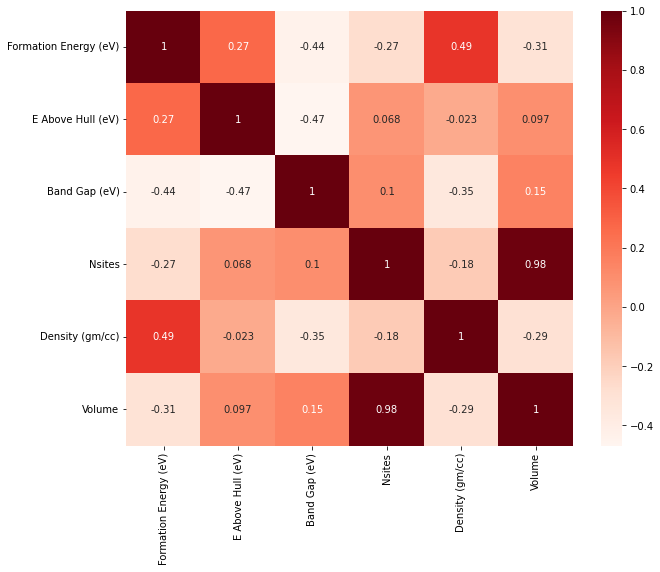

In [14]:
plt.figure(figsize=(10,8))
cor = data[num_feat].corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

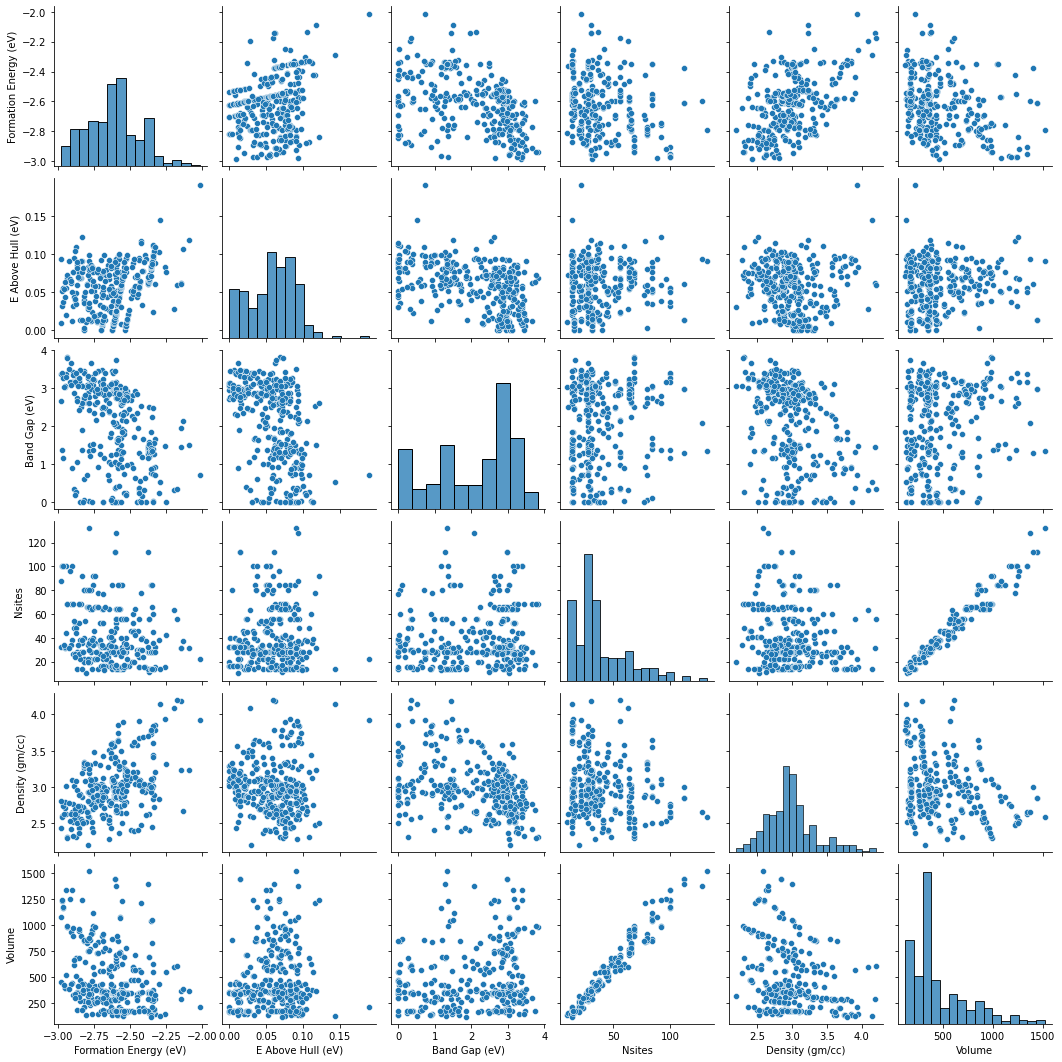

In [15]:
sns.pairplot(data[num_feat])

## **Question 2** **(15 points)**

**Part 1** (5 points)
Find the two **most** positively correlated(relevant) variables. Why do you think they are relevant? 

**Part 2** (5 points)
Find the two **least** correlated (cloasest to 0) variables. Why do you think they are **not** relevant? 

**Part 3** (5 points)
What about negative correlations?  Are two variables that are very negatively correlated predictable from each other?


###Question 2
####Part 1
Nsites Vs Volume (0.98)

Formation Energy (eV) Vs Density (0.49)

They both are the most positively correlated variables. They are relevant as we see the heatmap they both are the highest value close to 1.

####Part 2
E Above Hall (eV) Vs Density (-0.023)

E Above Hall (eV) Vs Nsites (0.068)

They both are the least correlated variables. THey are not relevant because they are close to 0. 

####Part 3
Negative Correlation is totally opposite of positive correlation instread of X incresing and Y increasing (positive Correlation) in negative Correlation whenever the X is increasing the Y is decreasing. 

Yes, two variable which are negatively correlated can be predicatable from each other.



Okay, now I know which variables are numerical and which are categorical. Since categorical ones bring ValueErrors, can we just use numerical ones? Let's give it a try.

In [16]:
method = DecisionTreeClassifier()
model = method.fit(train[num_feat].to_numpy(),train['Crystal System'].to_numpy())

Great!!! The model was successfully fit！ 🙂 Now, we can evaluate the performance on test set.

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [18]:
predicted_label=model.predict(test[num_feat].to_numpy())
groundtruth_label=test['Crystal System'].to_numpy()

accuracy=accuracy_score(predicted_label,groundtruth_label)

macro_precision=precision_score(predicted_label,groundtruth_label,average='macro')
micro_precision=precision_score(predicted_label,groundtruth_label,average='micro')

macro_recall=recall_score(predicted_label,groundtruth_label,average='macro')
micro_recall=recall_score(predicted_label,groundtruth_label,average='micro')

macro_f1=f1_score(predicted_label,groundtruth_label,average='macro')
micro_f1=f1_score(predicted_label,groundtruth_label,average='micro')

from tabulate import tabulate
results = [
["accuracy", accuracy],
["macro_precision", macro_precision],
["micro_precision",micro_precision],
["macro_recall",macro_recall],
["micro_recall",micro_recall],
["macro_f1",macro_f1],
["micro_f1",micro_f1],
] 
print (tabulate(results, headers=["Metrics", "Values"]))

Metrics            Values
---------------  --------
accuracy         0.5
macro_precision  0.470178
micro_precision  0.5
macro_recall     0.476471
micro_recall     0.5
macro_f1         0.4627
micro_f1         0.5


Ok, we already see things are interesting. There are several different metrics (accuracy, precision, recall, f1)! Hmmm....

Here is a great tutorial to help you out.

https://androidkt.com/micro-macro-averages-for-imbalance-multiclass-classification/#:~:text=Macro%20average%20deals%20with%20aggregates%20or%20totals%2C%20macro,price%20levels%2C%20and%20gross%20domestic%20product%20or%20GDP.

Part of this class is learning to be able to use outside resources to learn more about these topics.  Here is a chance to get some practice 😀

## **Question 3** **(10 points)**

**Part 1 (5 points)**

What do **original (binary)** accuracy, precision, recall and f1 mean? How are they counted?

**Part 2 (5 points)**  

What do **macro/micro** precision, recall and f1 mean? How are they counted? Why we use macro/micro metrics here instead of original binery ones? 


###Question 3
####Part 1
Accuracy: The Number of right answer over the entire predictions. It basically tell us how many answers we got it right out of all the guess we made.

We calculate it by: 
\begin{align}
        \frac{TP + TN}{TP + TN + FP + FN}
    \end{align}

Precision: How well we have guessed the label. Goal is to minimise mistakes in guessing positive labels

We can calculate it by:
\begin{align}
        \frac{TP}{TP + FP}
    \end{align}


Recall: How many positive labels one have found out to the total number of label that exits. Goal is to find most number of posititve labels.

We can calculate it by:
\begin{align}
        \frac{TP}{TP + FN}
    \end{align}


F1: Harmonic mean between precision and reall. Goal is to maximise both precision and recall. How good the quality of the predictions are and how completely we have predicted the labels in dataset.

We can calculate it by:
\begin{align}
        \frac{2 * TP}{2 * TP + FP + FN}
    \end{align}

####Part 2
Micro Average Precision: Here we sum up the individual true positives, false positives of the system for different sets and then apply them to get it. 

We can calculate it by:
\begin{align}
        \frac{TP1 + TP2 + TP3}{TP1 + TP2 + TP3 + FP1 + FP2 + FP3}
    \end{align}

Macro Average Precision: It is simply the average of the precision of the different classes.

We can calculate it by:
\begin{align}
        \frac{PC1 + PC2 + PC3}{3}
    \end{align}
where PC1, PC2, PC3 are precision of the respective classes.

Micro Average Recall: Here we sum up the individual true positives, false negatives of the system for different sets and then apply them to get it. 

We can calculate it by:
\begin{align}
        \frac{TP1 + TP2 + TP3}{TP1 + TP2 + TP3 + FN1 + FN2 + FN3}
    \end{align}

Macro Average Recall: It is simply the average of the Recall of the different classes.

We can calculate it by:
\begin{align}
        \frac{RC1 + RC2 + RC3}{3}
    \end{align}
where RC1, RC2, RC3 are Recall of the respective classes.


A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if there is class imbalance (i.e. there are more examples of one class than of other class).

Here we used Macro/micro metrics because of multi class classification.


# Solution with Feature Engineering

![?](https://www.mememaker.net/static/images/memes/4751028.jpg)

Randy 🧙 wanna ask you a question since you dropped all the categorical variables. Are these variables really not useful for classification? Let's encode these variables to allow them to be fit into the model. Then, we can see if they can impact the performance of the task.

### Categorical encoding methods
<a id='Categorical_encoding_methods'></a>

#### 1. One Hot Encoding
Method: Encode each category value into a binary vector, with size = # of distinct values. See https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

Example: Has Bandstructure column has 2 distinct values, True and False. Create a new column where 1 = True and 0 = False.

Pros: simple and rugged method to get categorical features into unique and useful numerical features

Cons: m unique values results in m unique new features. This is fine when there are only 2-3 unique values (such as hi/lo, yes/no), but creates issues when there are more. Can't handle new categories that weren't in training data, and easily overfit. Sparse data.

#### 2. Encode to ordinal variables
Method: assign each unique value to a unique number. 

Example: Spacegroup = Pc is assigned to 0, Spacegroup = P21/c is assigned to 1, etc. 

Pros: simple and quick, 1 column in -> 1 column out

Cons: residual "structure" (number assigned is arbitrary, and it leads algorithms to assume that a Spacegroup with a value of 20 is higher value than a Spacegroup of value 1)

#### 3. Feature Hashing
Method: Encode each unique category into a non-binary vector

Example: Spacegroup = Pc is assigned to [1,0,0], Spacegroup = P21/c is assigned to [1,2,-1], etc. Specify number of columns (length of vector)

Pros: low dimensionality so really efficient.

Cons: potential collisions (for example the 1st value in example has both Spacegroups sharing a '1'); hashed features aren't interpretable so can't be used in feature importance. **How do you come up with hashes to preserve distances!?**

#### 4. Other methods
Primarily involve prior knowledge about dataset. Encode with own algorithm to include closely related features.

Variation on One Hot Encoding for large numbers of unique values: classify infrequent instances into "rare" category. May lose some granularity and important info, but also allows for new categories that aren't in training data

Now, let's explore categorical variables one by one.

In [19]:
cat_feat

Index(['Materials Id', 'Formula', 'Spacegroup', 'Has Bandstructure',
       'Crystal System'],
      dtype='object')

### `'Materials Id'` column

In [20]:
data['Materials Id'].describe()

count           339
unique          339
top       mp-849394
freq              1
Name: Materials Id, dtype: object

339 unique values for 339 unique entries; there is no useful information in this column and it can be dropped.

## **Question 4** **(5 points)**

Why can this column be dropped?  I.e., why is a column with all unique values (and no prior information) not useful?



4 - Linearly independent?

In [21]:
data.drop(columns=['Materials Id'],inplace=True)
data.columns

Index(['Formula', 'Spacegroup', 'Formation Energy (eV)', 'E Above Hull (eV)',
       'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume',
       'Has Bandstructure', 'Crystal System'],
      dtype='object')

### `'Has Bandstructure'` column

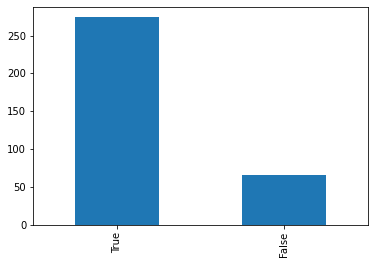

In [22]:
data['Has Bandstructure'].value_counts().plot(kind='bar')

2 unique values, True and False. Classic example of when to use one-hot encoding

In [23]:
# One-hot encode 'Has Bandstructure'
data['Has Bandstructure'] = data['Has Bandstructure'].map({True:1, False:0})

### `'Spacegroup'` column

44


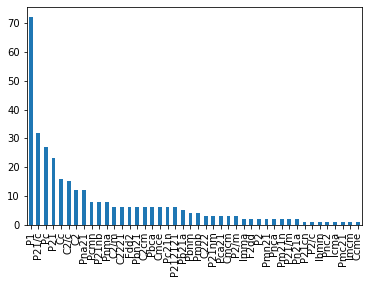

In [24]:
data['Spacegroup'].value_counts().plot(kind='bar')
print(data['Spacegroup'].nunique())

44 unique values, with most of them occuring multiple times

**Option 1:** One-hot encoding will result in 44 new feature columns; inefficient and memory-intensive.

**Option 2:** Encode to ordinal numbers. Will possibly work, but does leave a residual structure that may affect model performance

**Option 3:** Use Feature Hashing to create a vector representation of each unique Spacegroup. Note that if vector size = 44, it's the same as one-hot encoding, and if vector size = 1, it's the same as encoding to ordinal variables. What other vector size might be useful?  3 or 4?

In [25]:
# Option 1: One-hot encoding (not used)
pd.get_dummies(data['Spacegroup'])

,C2,C2/c,C2/m,C222,C2221,C2cm,Cc,Ccme,Cmce,Cmcm,F2dd,Fdd2,Ibmm,Icma,Imcm,Imma,P1,P2,P2/c,P2/m,P21,P21/c,P21/m,P212121,P21cn,P21nb,P21nm,Pb21a,Pbca,Pbn21,Pbnm,Pc,Pc21n,Pca21,Pcmn,Pm21n,Pmc21,Pmn21,Pmnb,Pn21a,Pna21,Pnc2,Pnca,Pnma
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
337,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Option 2: Ordinal number encoding
data['Spacegroup (ordinal)'] = pd.factorize(data['Spacegroup'])[0]

# Can also order by most common to least common
data['Spacegroup'].rank(method="dense").astype(int)

0      32
1      22
2       7
3       2
4       2
       ..
334    17
335    17
336    17
337    17
338    17
Name: Spacegroup, Length: 339, dtype: int64

In [27]:
# Option 3: Feature Hashing
from sklearn.feature_extraction import FeatureHasher
n = 3
fh = FeatureHasher(n_features=n, input_type='string')
hashed_tag = fh.fit_transform(data['Spacegroup']).toarray()
ht_df = pd.DataFrame(hashed_tag)
ht_df.columns = ['Spacegroup'+str(i) for i in range(n)]

data = data.join(ht_df)

### `'Formula'` column

In [28]:
data['Formula'].value_counts()

LiFeSiO4           42
LiCoSiO4           29
Li2FeSiO4          15
Li2CoSiO4          14
Li2MnSiO4          12
                   ..
Li3Co2Si3O10        1
Li10Co(SiO5)2       1
Li4Co2Si3O10        1
Li2FeSi4O11         1
Li5Co4(Si3O10)2     1
Name: Formula, Length: 114, dtype: int64

114 unique values, most only occuring once. One-hot encoding is out of the question

**Option 1,2,3:** one-hot encoding, ordinal number encoding, and feature hashing all become inefficient with such variety.

**Option 4:** Use domain knowledge to create additional features. For example, we can look at the LiFeSiO4 formula, and turn it into 4 new columns, each one indicating how many of each atom are in the formula (for example, {Li: 1, Fe: 1, Si: 1, O: 4})

 🧙  THIS MAKES RANDY HAPPY!


In [29]:
# Option 4: use chemparse package to create the new features of atom counts
import chemparse
chem_data = data['Formula'].apply(chemparse.parse_formula)

# Convert the dictionary into a dataframe and fill NaN's with zero's
chem_data = pd.json_normalize(chem_data)
chem_data = chem_data.fillna(0)

data = data.join(chem_data)

### `'Crystal System'` column
This is the target column, and there are 3 different types of crystal structures we're trying to classify. To properly transform this to numerical data, we have to understand if we are working on a multi-class problem or a multi-label problem.

- A multi-class problem is one in which there is only one distinct type of classification for each row. For example, a fruit is either an apple or an orange, but cannot be both. For a multi-class problem, the target value should be a single value, such as a 0 for apple and 1 for orange. In other words, it would be encoded to ordinal numbers.
- A multi-label problem is one in which there are possibly multiple labels for each row. For example, classifying pictures of apples and oranges can include a picture of an apple alone, an orange alone, or both an apple and an orange. For a multi-label problem, the target value should be a vector representation, such as [1,0] for apple, [0,1] for orange, and [1,1] for both apple and orange. In other words, we would have to one-hot encode the target feature.

Since the crystal system structure is unique, this is a multi-class problem. The target output should be encoded to a 0, 1, or 2. If it were a multi-label problem, the target output would have to be encoded to a vector of length 3. 

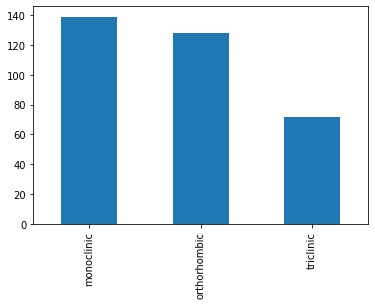

In [30]:
# Check for balance
data['Crystal System'].value_counts().plot(kind='bar')

In [31]:
# Encode Crystal System to ordinal values for multi-class problem
data['Crystal System (#)'] = data['Crystal System'].map({'monoclinic':0, 'orthorhombic':1, 'triclinic':2})

### Test performance

In [32]:
# All new numerical features (Crystal System excluded, since it's int32)
features = list(data.select_dtypes(include=['int64','float64']).columns.values)

ord_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
            'Spacegroup (ordinal)','Li','Mn','Si','O','Fe','Co'
           ]

hash_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
             'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
             'Spacegroup0','Spacegroup1','Spacegroup2','Li','Mn','Si','O','Fe','Co'
            ]

labels = ['Crystal System (#)']

In [33]:
titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])


In [34]:
print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.514706 |          0.491943 |          0.514706 |       0.511717 |       0.514706 |   0.489237 |   0.514706 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   1        |          1        |          1        |       1        |       1        |   1        |   1        |
| (Ordinal Spacegroup)             |            |                   |                   |           

Want to check the accuracy of each class? We can use the confusion matrix to show the results.

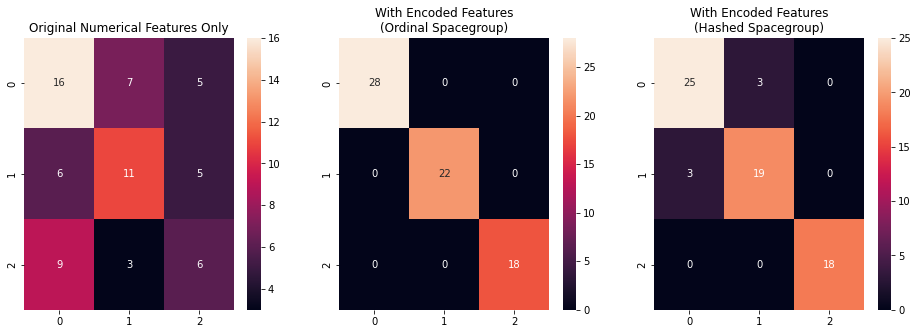

In [35]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

## **Question 5** **(10 points)**

Based on the above metrics table and confusion matrix, which feature engineering technique performs best and why?


5 - The Ordinal Spacegroup performs better. This is evident by the confusion matrix. With this method, 100% of the data (main diagonal) falls into the prediciton matches model category. 

## **Question 6** **(15 points)**
Try two different methods such as `linear_model.LogisticRegression`, `neighbors.KNeighborsClassifier` or `ensemble.RandomForestClassifier`. Report your results.
Can you achieve better performance than any of the previous models? Why do these methods perform better/worse than the decision tree?





6 - The only model that performed close to the decision tree was logistic regression, but still wasn't as good. Sonce we are only performing a single iteration of the test/training split, we are not properly cross-validating our data. This can lead to unreliable accuracy data, escecially for the decision tree.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


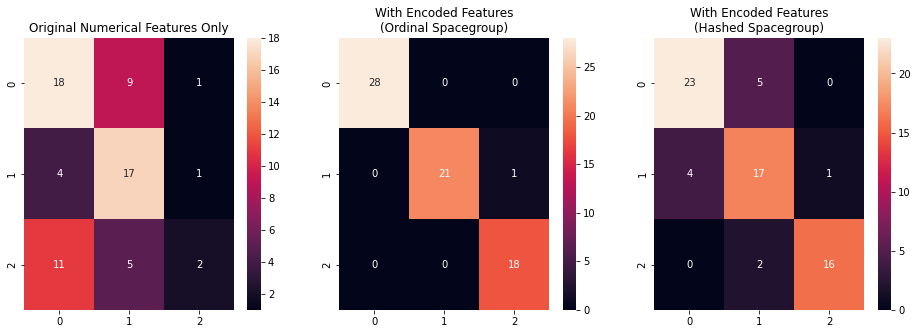

In [36]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]
    #80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)

    # change to your selected model
    model = LogisticRegression(max_iter=10000)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


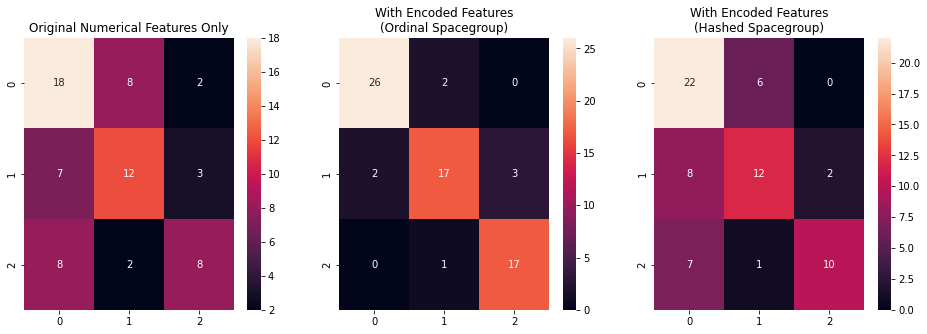

In [37]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]
    #80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)

    # change to your selected model
    model = KNeighborsClassifier(n_neighbors=3)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


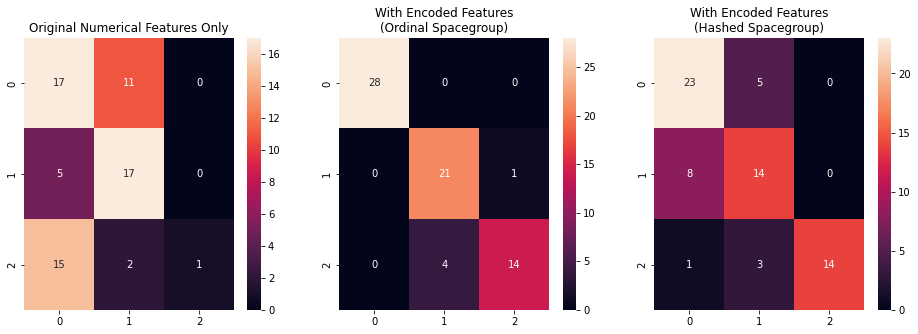

In [38]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]
    #80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)

    # change to your selected model
    model = RandomForestClassifier(max_depth=2, random_state=0)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

# Solution with Feature Engineering + rebalance dataset



Let's review the distribution of `Crystal System` again. It is clear that the three class is unbalanced. Dealing with imbalanced data is common in classification problems because such imbalance usually affects the performance of the model.

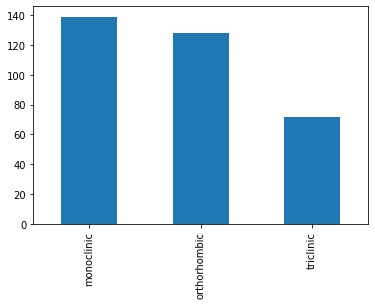

In [39]:
# Check for balance
data['Crystal System'].value_counts().plot(kind='bar')

Here, we use apply undersampling to `monoclinic` and `orthorhombic` so that they have the same number as `triclinic`.

In [40]:
monoclinic_data=data[data['Crystal System'] == 'monoclinic']
orthorhombic_data=data[data['Crystal System'] == 'orthorhombic']
triclinic_data=data[data['Crystal System'] == 'triclinic']

monoclinic_data_sampled = monoclinic_data.sample(n=len(triclinic_data))
orthorhombic_data_sampled = orthorhombic_data.sample(n=len(triclinic_data))

data_rebalanced=triclinic_data.append(monoclinic_data_sampled).append(orthorhombic_data_sampled).reset_index(drop=True)

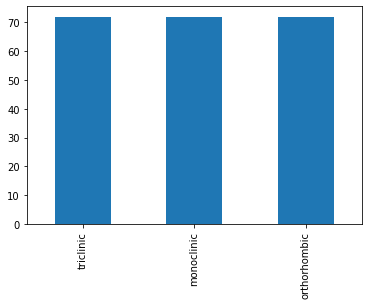

In [41]:
# Check for balance
data_rebalanced['Crystal System'].value_counts().plot(kind='bar')

Now that the dataset has been rebalanced, let's see if this affects the performance of the model.

## **Question 7** **(15 points)**
Redo the calculations, using the above `data_rebalanced` dataset. Report results and compare the results with the original(imbalance) dataset. Will rebalancing the data improve performance? Why?





7 - This rebalanced data does improve the results. In fact, it imporves the results across each model. In cases in which a particular class holds most of the data, almost every case will be classified as the majority class. However, rebalnacing data can lead to its own problems.

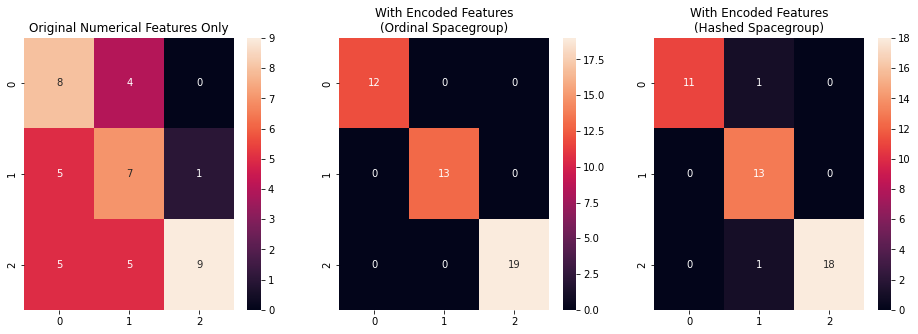

In [42]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data_rebalanced[feat]
    y = data_rebalanced[labels]

    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


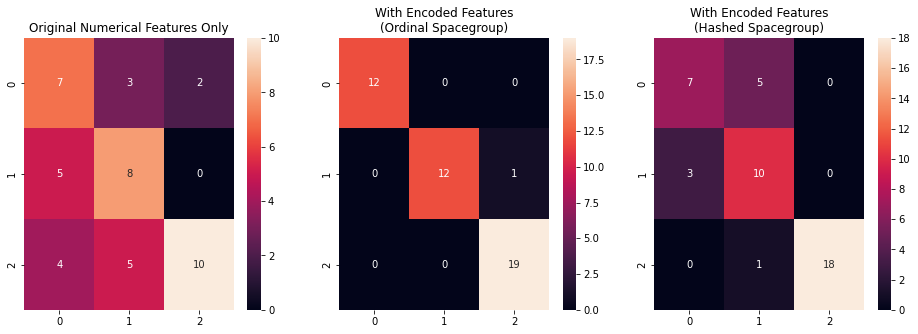

In [43]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data_rebalanced[feat]
    y = data_rebalanced[labels]
    #80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)

    # change to your selected model
    model = LogisticRegression(max_iter=10000)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


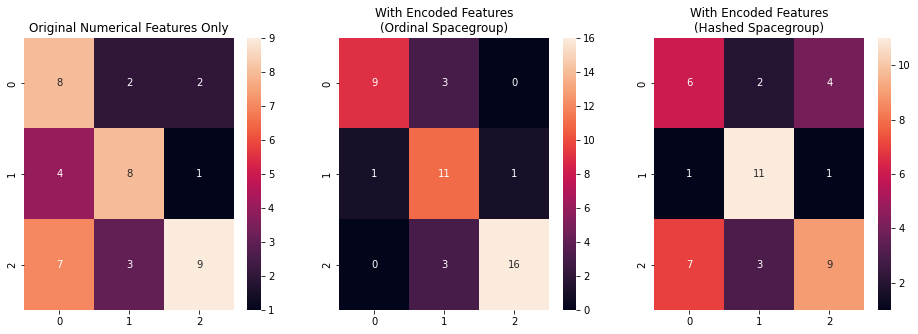

In [44]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data_rebalanced[feat]
    y = data_rebalanced[labels]
    #80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)

    # change to your selected model
    model = KNeighborsClassifier(n_neighbors=3)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


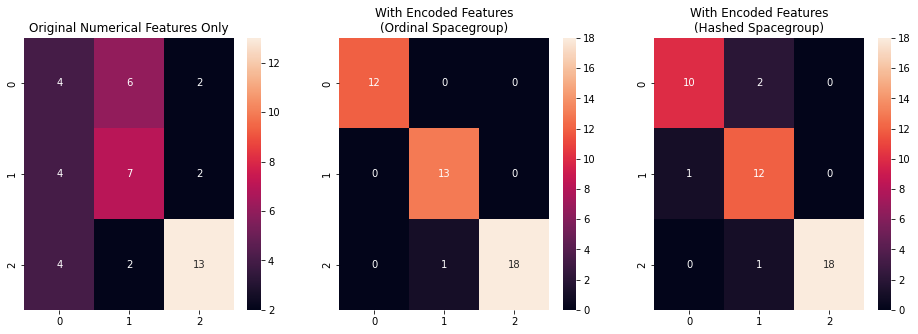

In [45]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data_rebalanced[feat]
    y = data_rebalanced[labels]
    #80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)

    # change to your selected model
    model = RandomForestClassifier(max_depth=2, random_state=0)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

# Solution with Feature Engineering + dimensionality reduction



Remember the mysterious technology Principal Component Analysis (PCA) that Randy 🧙 mentioned the lecture? Forgotten? Go review it, because it may appear on your midterm/final exam. 👀

Now, let's see how PCA works in the classification task. 
PCA performs better with a normalized feature set. We will perform standard scalar normalization to normalize our feature set first using `StandardScaler` and then apply `PCA`.

## **Applying PCA**

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.573529 |          0.602453 |          0.573529 |       0.579913 |       0.573529 |   0.586623 |   0.573529 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.661765 |          0.673761 |          0.661765 |       0.663403 |       0.661765 |   0.667612 |   0.661765 |
| (Ordinal Spacegroup)             |            |                   |                   |           

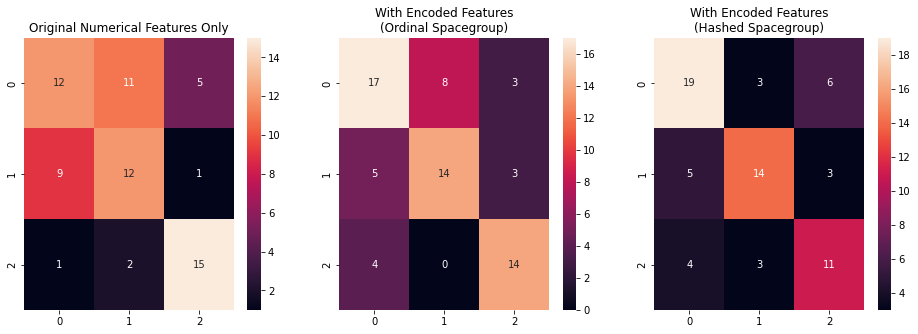

In [47]:
plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=4)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

## **Question 8** **(15 points)**

**Part 1 (5 points)**

How does PCA perform dimensionality reduction? Is it valid for numerical variable? Why? Is it valid for ordinal variable? Why? Is it valid for categorical variable? Why?

**Part 2 (10 points)**

Try different number of principal components (eg. `n_components=1,2,3,4`) on different methods (eg. `LogisticRegression`, `KNeighborsClassifier` or `naive_bayes` ), and report the results.

Does the classification effect increase as the number of principal components increases? Why?


8.1 - PCA maps higher dimensional data to lower dimensional space. PCA is valid for numerical and ordinal data, as it is already represnted as numbers. This is a requirement for PCA. This means it cannot use categorical data, unless it has previously been one-hot encoded.

8.2 - The classification effectiveness does increase as the number of principal components increases. The number of components equates to the number of dimensions. The more components, means the data is better represented. However, after a certain point, the extra components becomes unnecessary. 3 components seems to be enough.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.426471 |          0.371212 |          0.426471 |       0.283208 |       0.426471 |   0.311899 |   0.426471 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.397059 |          0.347763 |          0.397059 |       0.367063 |       0.397059 |   0.313353 |   0.397059 |
| (Ordinal Spacegroup)             |            |                   |                   |           

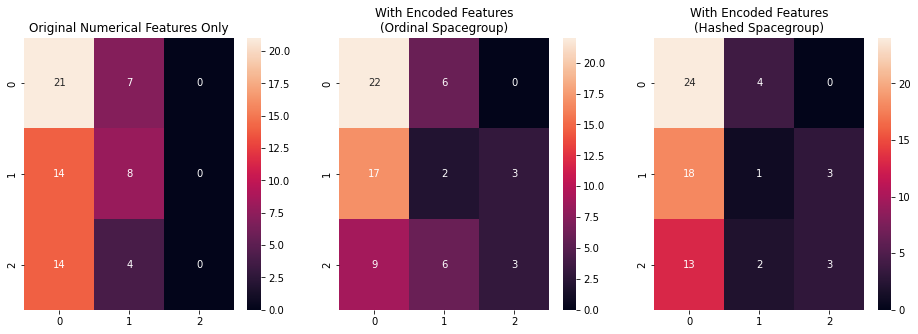

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=1)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    model = LogisticRegression(max_iter=10000)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.470588 |          0.446368 |          0.470588 |       0.495487 |       0.470588 |   0.441975 |   0.470588 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.426471 |          0.407528 |          0.426471 |       0.438725 |       0.426471 |   0.410773 |   0.426471 |
| (Ordinal Spacegroup)             |            |                   |                   |           

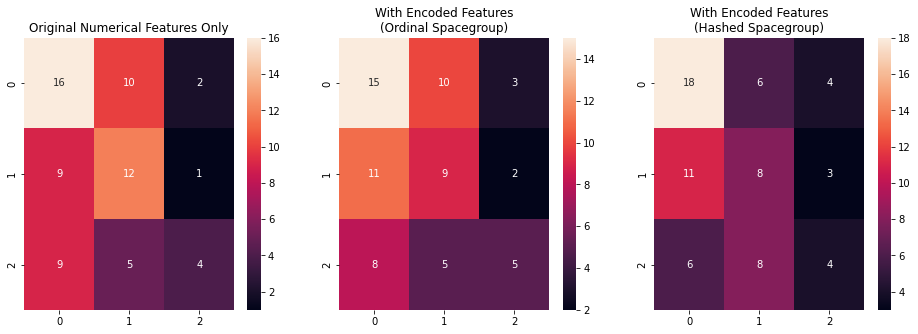

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=1)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    model = KNeighborsClassifier(n_neighbors=3)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.5      |          0.473184 |          0.5      |       0.471717 |       0.5      |   0.436445 |   0.5      |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.632353 |          0.640091 |          0.632353 |       0.654043 |       0.632353 |   0.64536  |   0.632353 |
| (Ordinal Spacegroup)             |            |                   |                   |           

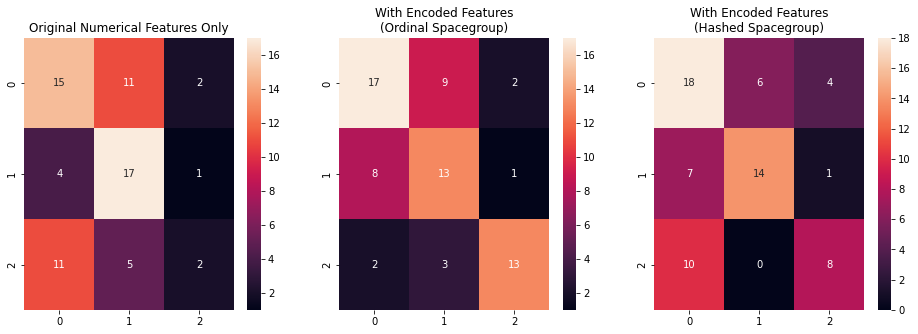

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=5)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    model = LogisticRegression(max_iter=10000)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.426471 |          0.397427 |          0.426471 |       0.390445 |       0.426471 |   0.377889 |   0.426471 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.632353 |          0.633357 |          0.632353 |       0.646825 |       0.632353 |   0.637369 |   0.632353 |
| (Ordinal Spacegroup)             |            |                   |                   |           

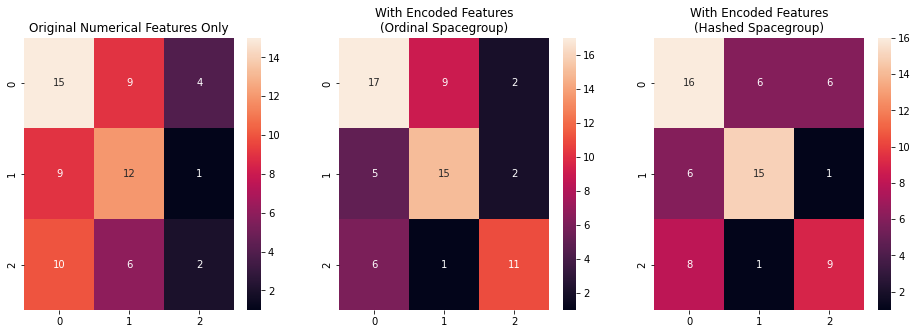

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=5)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    model = KNeighborsClassifier(n_neighbors=3)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.5      |          0.473184 |          0.5      |       0.471717 |       0.5      |   0.436445 |   0.5      |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.676471 |          0.679173 |          0.676471 |       0.675499 |       0.676471 |   0.676647 |   0.676471 |
| (Ordinal Spacegroup)             |            |                   |                   |           

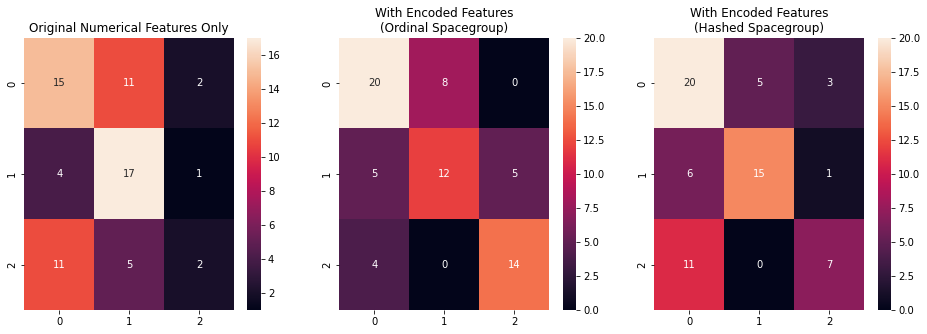

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=6)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    model = LogisticRegression(max_iter=10000)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.426471 |          0.397427 |          0.426471 |       0.390445 |       0.426471 |   0.377889 |   0.426471 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.720588 |          0.714646 |          0.720588 |       0.722222 |       0.720588 |   0.717178 |   0.720588 |
| (Ordinal Spacegroup)             |            |                   |                   |           

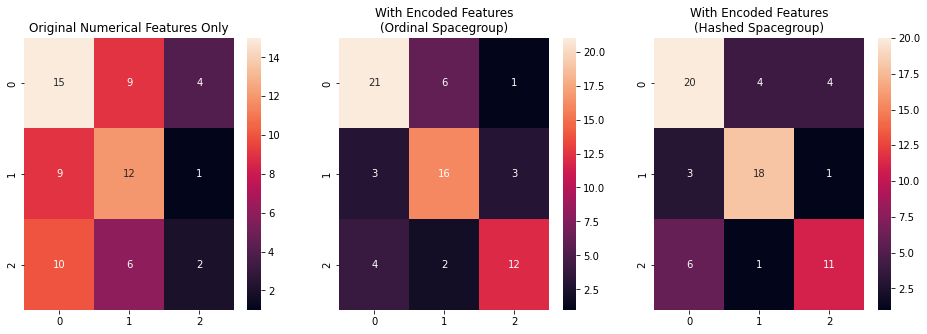

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=6)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    model = KNeighborsClassifier(n_neighbors=3)

    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

## **Question 9** **($\infty$ points, since this is where you really learn stuff! :-)**

You can get as many points of extra credit as you like by doing a good job with this question!

Play around with doing a better analysis.  Things to try:

1.   This problem is easier that Case Study 1 in that you seem to have enough data to do a good job.  Can you make the problem harder and still do well?  E.g., if you make your training data smaller and smaller then is there some limit where you don't do well anymore?  This tells you how many experiments you need!
2.   Try different train and test splits and see if the answer changes (i.e., 
```
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1234)
```
3.   Try different dimensionality reduction methods (other than PCA). Here are several examples in Sci-kit learn (https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html?highlight=manifold%20learning). Do any work better than others?



## **test_size = 0.5**

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.429412 |          0.408336 |          0.429412 |       0.422526 |       0.429412 |   0.411722 |   0.429412 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.570588 |          0.580107 |          0.570588 |       0.580438 |       0.570588 |   0.579936 |   0.570588 |
| (Ordinal Spacegroup)             |            |                   |                   |           

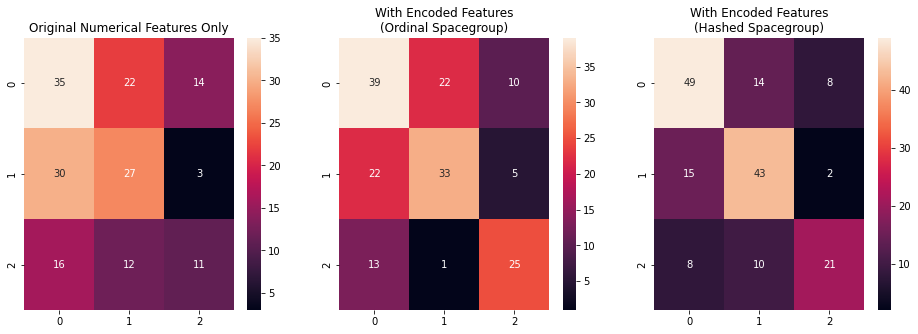

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=4)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

## **test_size = 0.3**

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.470588 |          0.480268 |          0.470588 |       0.471747 |       0.470588 |   0.473649 |   0.470588 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.568627 |          0.595246 |          0.568627 |       0.573611 |       0.568627 |   0.577971 |   0.568627 |
| (Ordinal Spacegroup)             |            |                   |                   |           

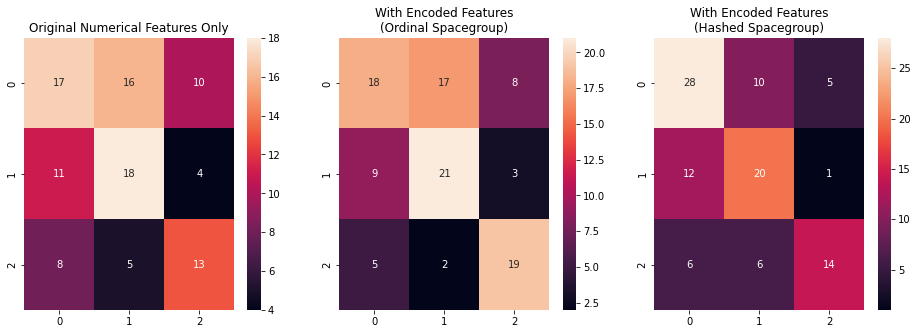

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=4)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

## **Test_size = 0.1**

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.529412 |          0.544872 |          0.529412 |       0.554167 |       0.529412 |   0.535923 |   0.529412 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.617647 |          0.60114  |          0.617647 |       0.657143 |       0.617647 |   0.60989  |   0.617647 |
| (Ordinal Spacegroup)             |            |                   |                   |           

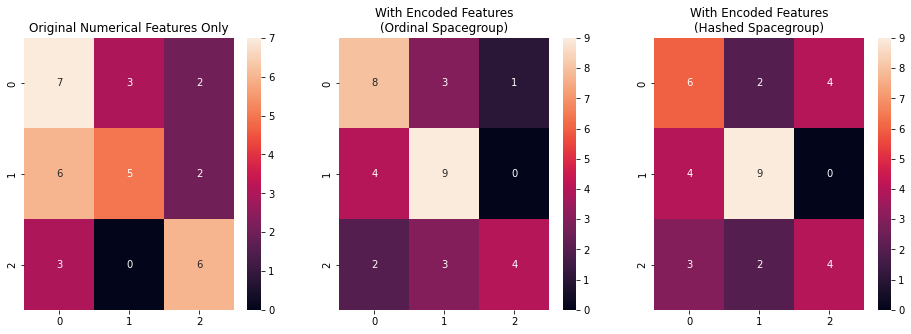

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=4)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

## **Test_size = 0.05**

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.705882 |          0.779762 |          0.705882 |       0.708333 |       0.705882 |   0.726984 |   0.705882 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.705882 |          0.529762 |          0.705882 |       0.497354 |       0.705882 |   0.512605 |   0.705882 |
| (Ordinal Spacegroup)             |            |                   |                   |           

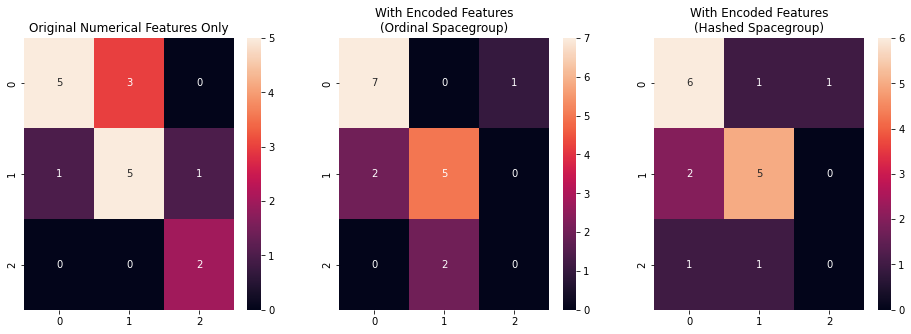

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=4)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.05,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

## **test_size = 0.01**

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |       0.75 |          0.833333 |              0.75 |       0.75     |           0.75 |   0.733333 |       0.75 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |       0.25 |          0.166667 |              0.25 |       0.25     |           0.25 |   0.2      |       0.25 |
| (Ordinal Spacegroup)             |            |                   |                   |           

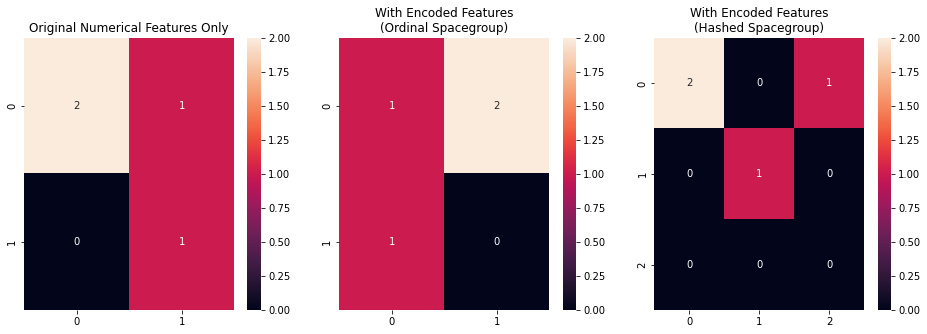

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 
    sc = StandardScaler()
    pca = PCA(n_components=4)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.01,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])
    
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

## **Manifold**

In [59]:
data.shape

(339, 21)

##TSNE

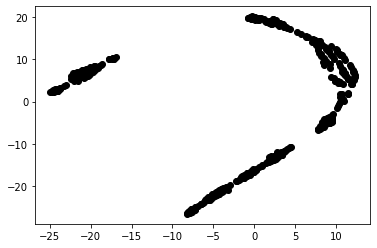

In [60]:
import numpy as np
from sklearn.manifold import TSNE
X = data[feat]
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X)
X_embedded.shape

x = X_embedded[:,0]
y = X_embedded[:,1]

plt.plot(x, y, 'o', color='black');


##MDS

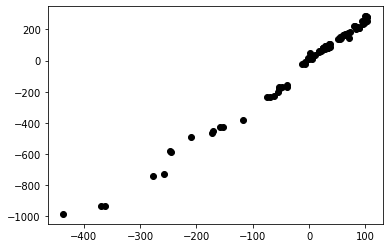

In [64]:
from sklearn.manifold import MDS
X = data[feat]

embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
X_transformed.shape

x = X_transformed[:,0]
y = X_transformed[:,1]

plt.plot(x, y, 'o', color='black');

Here we are able to get linear data which is great

###Isomap

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

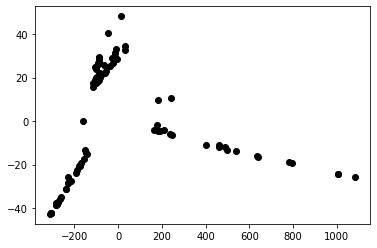

In [62]:
from sklearn.manifold import Isomap
X = data[feat]

embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
X_transformed.shape

x = X_transformed[:,0]
y = X_transformed[:,1]

plt.plot(x, y, 'o', color='black');